## Length of the code {-}
No restriction

**Delete this section from the report, when using this template.** 

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import time 
import itertools 

## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data quality check
*By Luke Lilienthal*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [4]:
train = pd.read_csv('Effect on Education')

In [5]:
#...Distribution of continuous variables...#
train.describe()

# We look at the scale of variance and quartiles across predictors. 
# The range of values is important to note in order to interpret coefficient results.

,Wage,AFQT,Educ,Exper,Age,Meduc,Logwage
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,1002.269841,101.868481,13.673469,11.555556,33.068027,10.716553,6.826152
std,417.337401,14.882141,2.259817,4.226779,3.012836,2.902025,0.414586
min,233.000000,50.000000,9.000000,1.000000,28.000000,0.000000,5.451038
25%,690.000000,93.000000,12.000000,8.000000,31.000000,8.000000,6.536692
50%,947.000000,103.000000,13.000000,11.000000,33.000000,12.000000,6.853299
75%,1200.000000,112.000000,16.000000,15.000000,36.000000,12.000000,7.090077
max,2500.000000,137.000000,18.000000,22.000000,38.000000,18.000000,7.824046


In [39]:
corr = train.corrwith(train.Wage).sort_values(ascending=False)
print(corr)

#Here we observe relatively low linear correlations with Wage- lets look at correlation with logWage

Wage       1.000000
Logwage    0.963846
AFQT       0.349504
Educ       0.339001
Meduc      0.209436
Age        0.197729
Exper      0.019706
dtype: float64


In [40]:
logcorr = train.corrwith(train.Logwage).sort_values(ascending=False)
print(logcorr)

#Comprable correlation results- (may suggest low levels of Heteroskedasticity in error terms)

Logwage    1.000000
Wage       0.963846
AFQT       0.370152
Educ       0.321197
Meduc      0.214142
Age        0.197037
Exper      0.052629
dtype: float64


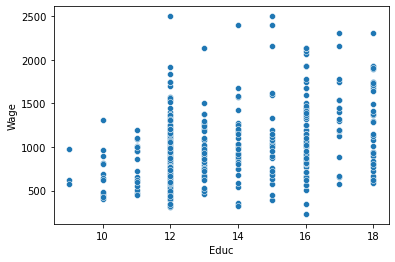

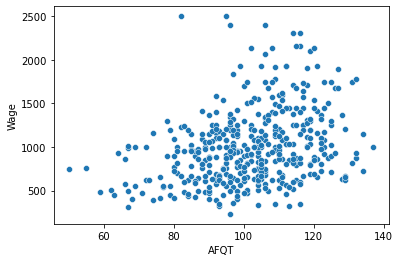

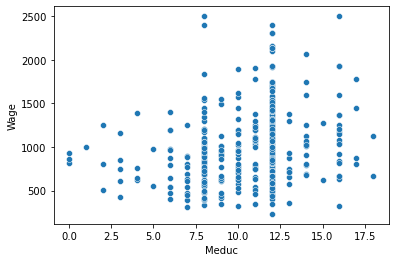

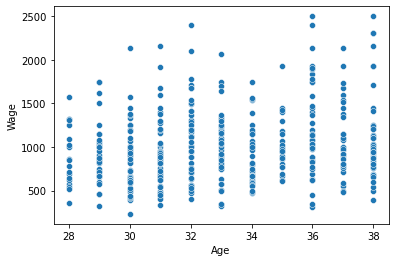

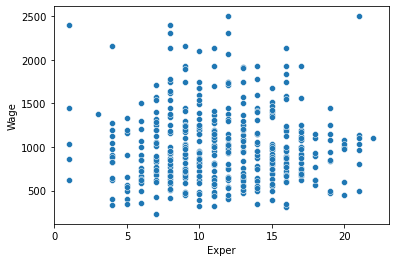

In [6]:
#...Association of the response with the predictors...#

#Now, look for patterns in individual predictor scatterplots
sns.scatterplot(x=train.Educ, y=train.Wage)
plt.show()

sns.scatterplot(x=train.AFQT, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Meduc, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Age, y=train.Wage)
plt.show()

sns.scatterplot(x=train.Exper, y=train.Wage)
plt.show()

# General positive trends with Wage and fairly weak associations. 
# Apparent non-linear trends with AFQT and Educ

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:

1. Some of the columns that should have contained only numeric values, specifically <>, <>, and <> have special characters such as \*, #, %. We'll remove these characters, and convert the datatype of these columns to numeric.

2. Some of the columns have more than 60% missing values, and it is very difficult to impute their values, as the values seem to be missing at random with negligible association with other predictors. We'll remove such columns from the data.

3. The column `number_of_bedrooms` has some unreasonably high values such as 15. As our data consist of single-family homes in Evanston, we suspect that any value greater than 5 may be incorrect. We'll replace all values that are greater than 5 with an estimate obtained using the $K$-nearest neighbor approach.

4. The columns `house_price` has some unreasonably high values. We'll tag all values greater than 1 billion dollars as "potentially incorrect observation", to see if they distort our prediction / inference later on.

The code below implements the above cleaning.

In [7]:
#...Code with comments...#

### Data preparation
*By Junho Park*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. We split our data into training and testing datasets for cross-validation purposes. We used the train_test_split method to split 20 percent of our data into testing and 80 percent of our data into training. 

In [41]:
# split data into training and testing data
y = train.iloc[:, 0]
X = train.iloc[:, [1, 2, 3, 4, 5, 6]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [9]:
######---------------Creating new predictors----------------#########

#Creating number of bedrooms per unit floor area

#Creating ratio of bathrooms to bedrooms

#Creating ratio of carpet area to floor area

In [10]:
######-----------Shuffling the dataset for K-fold------------#########

In [11]:
######-----Standardizing the dataset for Lasso / Ridge-------#########

In [12]:
## Splitting data, 

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

Initial Model

In [13]:
initialmodel = smf.ols(formula = 'Wage~I(AFQT**2)+Educ+Exper-1', data = train).fit()
initialmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              852.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                   3.57e-160
Time:                        15:51:30   Log-Likelihood:                         -2583.1
No. Observations:                 352   AIC:                                      5172.
Df Residuals:                     349   BIC:                                      5184.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
I(AFQT ** 2)     0.0301      0.008      3.735      0.000       0.014       0.046
Educ            39.0676      6.850      5.703      0.000      25.595      52.540
Exper           12.6895      3.749      3.385      0.001       5.316      20.063
==============================================================================
Omnibus:                       58.289   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.998
Skew:                           0.980   Prob(JB):                     2.35e-21
Kurtosis:                       4.623   Cond. No.                     3.86e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

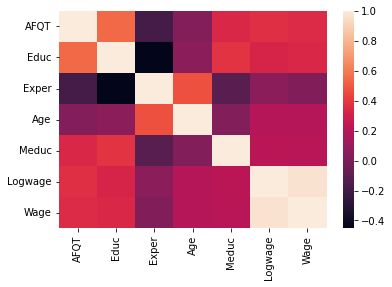

In [14]:
sns.heatmap(train.corr())

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

#### Colinearity analysis of initial model - by Diqiao Wang

In [26]:
X = train[['AFQT','Educ','Exper','Age','Meduc','Wage']]
X.columns[1:]

Index(['Educ', 'Exper', 'Age', 'Meduc', 'Wage'], dtype='object')

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

  feature         VIF
0   const  175.661848
1    AFQT    1.532951
2    Educ    2.120606
3   Exper    1.861446
4     Age    1.473844
5   Meduc    1.208841
6    Wage    1.245449


Computing the VIF values of the predictors for our initial model, we find that the predictors all have a VIF value relatively close to 1, meaning there is no evidence of collinearity between our predictors. 

In [18]:
1/(1-0.877)

8.130081300813009

We find the VIF value of our response variable, wage, is 8.13 using our initial model. This ia moderate value, meaning we can overlook the assumption of collinearity in our initial model. 

#### Model Assumptions - by Junho Park

Check the RMSE values for the training and test data to check for overfitting.

In [28]:
pred_wage = initialmodel.predict(train)
np.sqrt(((train.Wage - pred_wage)**2).mean())

372.16303337351377

In [29]:
pred_wage = initialmodel.predict(test)
np.sqrt(((test.Wage - pred_wage)**2).mean())

414.8114189856498

Since the RMSE values are similar, we can conclude that there is no evidence of overfitting in our initial model

Now, we can plot the residuals vs. fitted values plot to check for model assumptions.

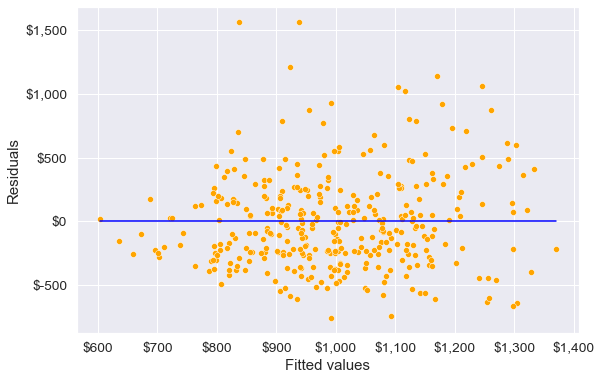

In [30]:
pred_wage = initialmodel.predict(train)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = initialmodel.fittedvalues, y=initialmodel.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

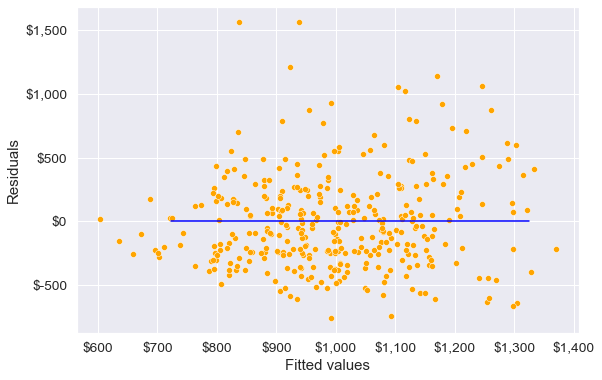

In [32]:
pred_wage = initialmodel.predict(test)

#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = initialmodel.fittedvalues, y=initialmodel.resid,color = 'orange')
sns.lineplot(x = [pred_wage.min(),pred_wage.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')

We find that the non-linearity and the constant variance assumptions are both met for our initial model. The non-linearity assumption is met since we do not observe a strong pattern in the residuals around the line Residuals = 0. Residuals are distributed more or less in a similar manner on both sides of the blue line for all fitted values. The constant variance assumption is met since we see that the variance of errors seems to stay constant with increase in the fitted values.

#### Outliers and Influential Point Analysis - By Junho Park

In [34]:
out_1 = initialmodel.outlier_test()
np.sum((np.abs(out_1.student_resid)>3))

4

We observe that our model contains 4 outliers

0

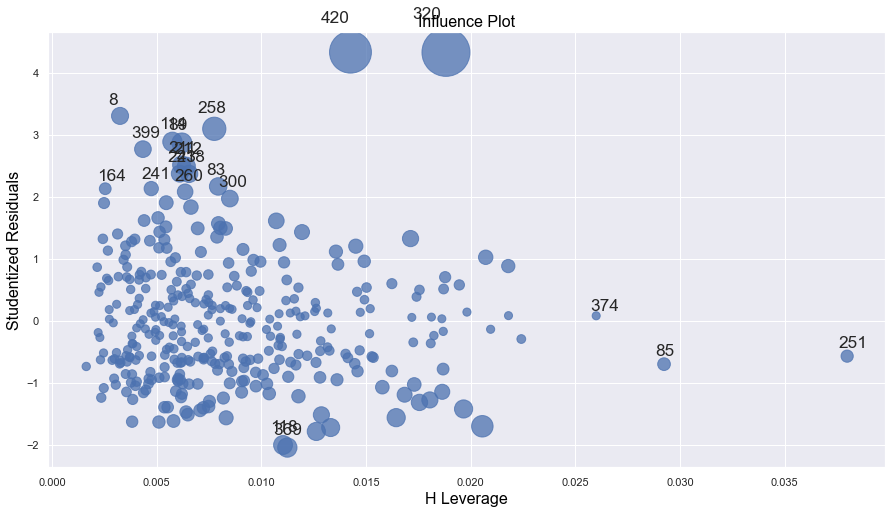

In [36]:
influence_1 = initialmodel.get_influence()
leverage_1 = influence_1.hat_matrix_diag

sns.set(rc={'figure.figsize':(15,8)})
sm.graphics.influence_plot(initialmodel);
out = modelfinal1.outlier_test()
average_leverage_1 = (initialmodel.df_model+1)/initialmodel.nobs
high_leverage_threshold_1 = 4*average_leverage_1
np.sum(leverage_1>high_leverage_threshold_1)

We observe that none of the outliers are influential points. We have no influential points, which means there is no need to delete any observations from our data. 

#### Errors and Homoscedasticity - Diqiao Wang

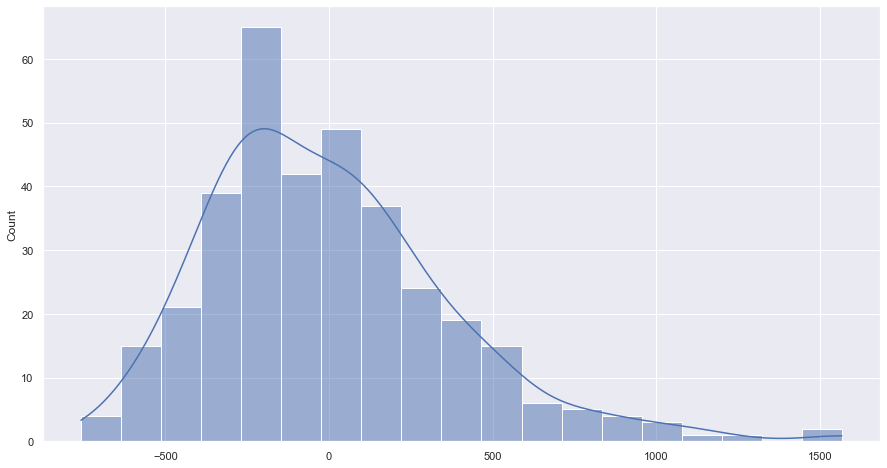

In [37]:
sns.histplot(data=initialmodel.resid, kde=True)
plt.show()

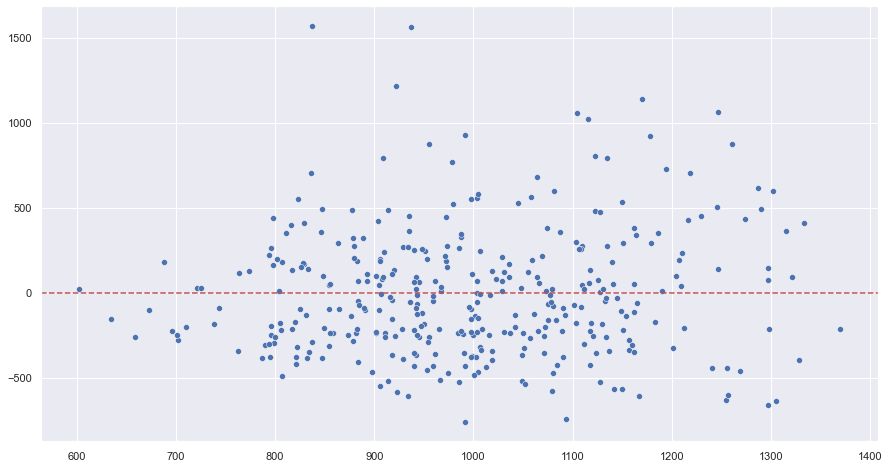

In [38]:
sns.scatterplot(data=train, x=initialmodel.predict(), y=initialmodel.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### Best Subset and Stepwise Selection - by Alanda Zong

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [19]:
modelfinal1 = smf.ols(formula='Wage~I(AFQT**2)*Educ+Exper-1', data=train).fit()
modelfinal1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wage   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              645.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                   1.69e-159
Time:                        15:51:36   Log-Likelihood:                         -2581.1
No. Observations:                 352   AIC:                                      5170.
Df Residuals:                     348   BIC:                                      5186.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
I(AFQT ** 2)          0.0015      0.017      0.091      0.928      -0.031       0.034
Educ                 32.3469      7.639      4.234      0.000      17.322      47.372
I(AFQT ** 2):Educ     0.0021      0.001      1.956      0.051   -1.21e-05       0.004
Exper                19.4391      5.085      3.823      0.000       9.438      29.440
==============================================================================
Omnibus:                       56.857   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.136
Skew:                           0.939   Prob(JB):                     1.33e-21
Kurtosis:                       4.741   Cond. No.                     6.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Final Model - by Luke

In [20]:
#Using logwage

In [21]:
modelfinal_log = smf.ols(formula='Logwage~I(AFQT**2)*Educ+Exper-1', data=train).fit()
modelfinal_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Logwage   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.172e+04
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                        0.00
Time:                        15:51:37   Log-Likelihood:                         -203.53
No. Observations:                 352   AIC:                                      415.1
Df Residuals:                     348   BIC:                                      430.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
I(AFQT ** 2)          0.0005   1.94e-05     23.683      0.000       0.000       0.000
Educ                  0.4535      0.009     50.936      0.000       0.436       0.471
I(AFQT ** 2):Educ -3.172e-05   1.25e-06    -25.318      0.000   -3.42e-05   -2.93e-05
Exper                 0.0390      0.006      6.574      0.000       0.027       0.051
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.717
Skew:                          -0.108   Prob(JB):                        0.699
Kurtosis:                       3.046   Cond. No.                     6.64e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.